In [1]:
from IPython.display import Image

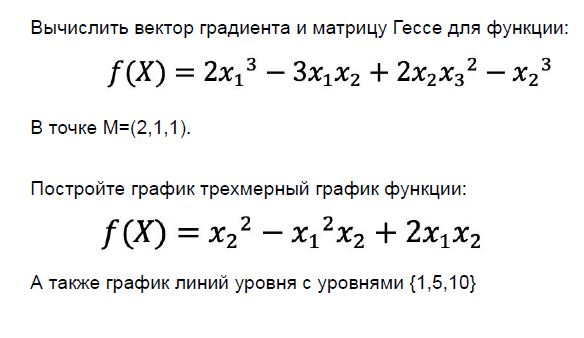

In [2]:
Image("C:\Мои занятия\Нетология\Математика для DS(18)\Лекция 5\hw.JPG")

In [35]:
import numpy as np
from scipy.optimize import approx_fprime
from sympy import *
from scipy.misc import derivative
import scipy
import numdifftools as nd

### Task 1

In [64]:
# вектор градиента
M = np.array([2., 1., 1.])

def func(x):
    return 2 * x[0]**3 - 3 * x[0]* x[1] + 2 * x[1] * x[2]**2 - x[1]**3

eps = np.sqrt(np.finfo(float).eps)
grad = approx_fprime(M, func, [eps, eps, eps])
print(f'Градиент функции в точке M=(2, 1, 1) равен {grad}')

Градиент функции в точке M=(2, 1, 1) равен [21.00000024 -7.          4.        ]


In [65]:
# матрица Гессе

def hessianComp(func, M, epsilon=1.e-5):
    f1 = approx_fprime(M, func, epsilon=epsilon) 

    # Allocate space for the hessian
    n = M.shape[0]
    hessian = np.zeros( ( n, n ) )
    # The next loop fill in the matrix
    xx = M
    for j in range( n ):
        xx0 = xx[j] # Store old value
        xx[j] = xx0 + epsilon # Perturb with finite difference
        # Recalculate the partial derivatives for this new point
        f2 = approx_fprime(xx, func, epsilon=epsilon) 
        hessian[:, j] = (f2 - f1)/epsilon # scale...
        xx[j] = xx0 # Restore initial value of x0        
    return hessian
print(f'Матрица Гессе для заданной функции в точке M=(2, 1, 1)')
print(hessianComp(func, M))

Матрица Гессе для заданной функции в точке M=(2, 1, 1)
[[24.00007304 -3.00000025  0.        ]
 [-3.00000025 -6.00003602  4.00001809]
 [ 0.          4.00001809  4.00000033]]


In [66]:
# альтернативный способ
print(f'Матрица Гессе для заданной функции в точке M=(2, 1, 1)')
print(nd.Hessian(func)([2., 1., 1.]))

Матрица Гессе для заданной функции в точке M=(2, 1, 1)
[[24. -3.  0.]
 [-3. -6.  4.]
 [ 0.  4.  4.]]


### Task 2

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [82]:
def func0(x1, x2):
    return x2**2 - x1**2 * x2 + 2*x1 * x2

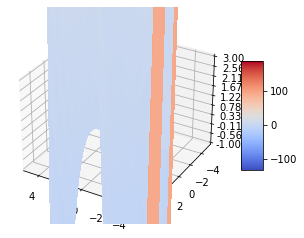

In [83]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X1 = np.arange(-5, 5, 0.25)
X2 = np.arange(-5, 5, 0.25)
X1, X2 = np.meshgrid(X1, X2)
Z = func0(X1, X2)

# Plot the surface.
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1, 3.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim = 120
ax.dist = 10
ax.elev = 30

plt.show()

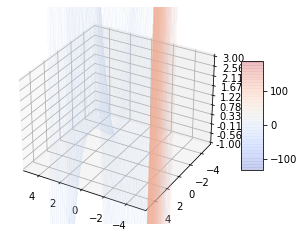

In [84]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X1 = np.arange(-5, 5, 0.25)
X2 = np.arange(-5, 5, 0.25)
X1, X2 = np.meshgrid(X1, X2)
Z = func0(X1, X2)

# Plot the surface.
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.1)

# Customize the z axis.
ax.set_zlim(-1, 3.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim = 120
ax.dist = 10
ax.elev = 30

plt.show()

In [85]:
delta = 0.025
x1 = np.arange(-3.0, 3.0, delta)
x2 = np.arange(-3.0, 3.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = func0(X1, X2)

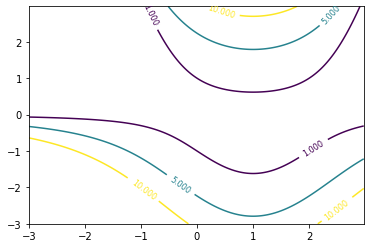

In [86]:
fig, ax = plt.subplots();
CS = ax.contour(X1, X2, Z,[1,5,10]);
ax.clabel(CS,inline=True, fontsize=8);